<h1 id='tocheading'>Table of Content</h1>
<div id='toc'></div>

In [65]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Data Cleaning

In [37]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit

## Order Dataset

In [3]:
# read data from csv file
order_df = pd.read_csv('olist_orders_dataset.csv')
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
# drop unnecessary columns
order_df.drop(['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date'], axis=1, inplace=True)
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
order_id                    99441 non-null object
customer_id                 99441 non-null object
order_purchase_timestamp    99441 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


In [5]:
# assign variable type
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df.dtypes

order_id                            object
customer_id                         object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [6]:
# duplicate rows
order_df[order_df.duplicated()]

,order_id,customer_id,order_purchase_timestamp


In [7]:
# data entries
order_df.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


## Payment Dataset

In [8]:
# read data from csv file
payment_df = pd.read_csv('olist_order_payments_dataset.csv')
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
# drop unnecessary columns
payment_df.drop(['payment_sequential', 'payment_type','payment_installments'], axis='columns', inplace=True)
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 2 columns):
order_id         103886 non-null object
payment_value    103886 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [10]:
# duplicate rows
payment_df[payment_df.duplicated()]

,order_id,payment_value
3675,8ca5bdac5ebe8f2d6fc9171d5ebc906a,15.00
4829,59d02be1c50fb6e6930cafd6ff6a31e5,20.00
5091,4689b1816de42507a7d63a4617383c59,56.42
6940,cf101c3abd3c061ca9f78c1bbb1125af,8.46
7441,d744783ed2ace06cac647a9e64dcbcfd,1.47
...,...,...
102942,dbc097913df341f30b9f9e92f459cee2,50.00
103046,c5fd5386640ddd76adc482b72d24a02b,5.79
103216,4d9190887b47ff1b89c657c788c038f6,12.80
103551,1ea11b975aea60ca92fa0559184d3d34,12.69


In [11]:
payment_df.head()

,order_id,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
3,ba78997921bbcdc1373bb41e913ab953,107.78
4,42fdf880ba16b47b59251dd489d4441a,128.45


In [12]:
payment_df.nunique()

order_id         99440
payment_value    29077
dtype: int64

## Customer Dataset

In [13]:
# read data from csv file
customer_df = pd.read_csv('olist_customers_dataset.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
# drop unnecessary columns
customer_df.drop(['customer_zip_code_prefix', 'customer_city', 'customer_state'], axis=1, inplace=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
customer_id           99441 non-null object
customer_unique_id    99441 non-null object
dtypes: object(2)
memory usage: 1.5+ MB


In [15]:
customer_df[customer_df.duplicated()]

,customer_id,customer_unique_id


In [16]:
customer_df.head()

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066


In [17]:
payment_order_df = pd.merge(payment_df, order_df, how='left', on='order_id')
payment_order_df.head()

,order_id,payment_value,customer_id,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17


In [57]:
pay_order_cust_df = pd.merge(payment_order_df, customer_df, how='left', on='customer_id')
pay_order_cust_df.head()

,order_id,payment_value,customer_id,order_purchase_timestamp,customer_unique_id
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,708ab75d2a007f0564aedd11139c7708
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,a8b9d3a27068454b1c98cc67d4e31e6f
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,6f70c0b2f7552832ba46eb57b1c5651e
3,ba78997921bbcdc1373bb41e913ab953,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,87695ed086ebd36f20404c82d20fca87
4,42fdf880ba16b47b59251dd489d4441a,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17,4291db0da71914754618cd789aebcd56


In [58]:
pay_order_cust_df = pay_order_cust_df.sample(frac=0.1)
pay_order_cust_df.shape[0]

10389

# Feature Engineering

In [60]:
rfm_df = pay_order_cust_df.groupby('customer_unique_id').agg({'order_purchase_timestamp':'max', 'order_id':'count', 'payment_value':'sum'})
%timeit
rfm_df.order_purchase_timestamp = rfm_df.order_purchase_timestamp.apply(lambda x: (max(rfm_df.order_purchase_timestamp)-x).days)
rfm_df.columns = ['recency', 'frequency', 'monetary']
rfm_df.to_csv('rfm.csv', index=False);
#rfm_df = pd.read_csv('rfm.csv')
rfm_df.head()

,recency,frequency,monetary
customer_unique_id,,,
00090324bbad0e9342388303bb71ba0a,207,1,63.66
000c8bdb58a29e7115cfc257230fb21b,308,1,29.00
0010a452c6d13139e50b57f19f52e04e,463,1,325.93
00172711b30d52eea8b313a7f2cced02,81,1,122.07
001928b561575b2821c92254a2327d06,53,1,164.81


# EDA

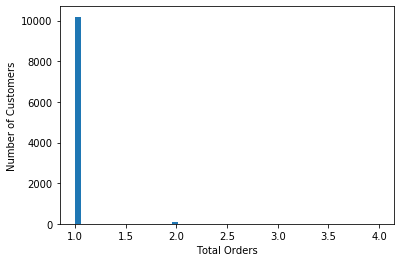

In [61]:
plt.hist(rfm_df.frequency, bins=50)
plt.xlabel('Total Orders')
plt.ylabel('Number of Customers');

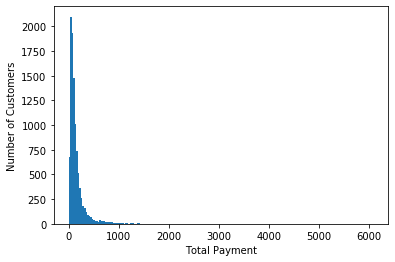

In [62]:
plt.hist(rfm_df.monetary, bins=200)
plt.xlabel('Total Payment')
plt.ylabel('Number of Customers');

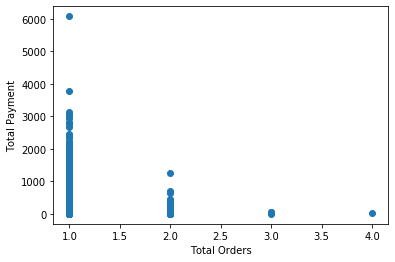

In [63]:
plt.scatter(rfm_df.frequency,rfm_df.monetary)
plt.xlabel('Total Orders')
plt.ylabel('Total Payment');

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_df)

# K-means Clustering

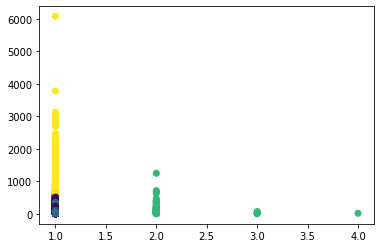

In [74]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4).fit(X_scaled)
labels = km.labels_
plt.scatter(rfm_df.frequency, rfm_df.monetary, c=labels);